In [6]:
import pandas as pd

# Load your dataset using the exact filename
df = pd.read_csv('uber.csv')

# Display the first 5 rows
print(df.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('uber.csv')

# ✅ 1. Drop unnecessary columns if any
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# ✅ 2. Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# ✅ 3. Drop rows with missing values
df_cleaned = df.dropna()

# ✅ 4. Convert pickup_datetime to datetime type
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

# ✅ 5. Feature Engineering
df_cleaned['hour'] = df_cleaned['pickup_datetime'].dt.hour
df_cleaned['day'] = df_cleaned['pickup_datetime'].dt.day
df_cleaned['month'] = df_cleaned['pickup_datetime'].dt.month
df_cleaned['day_of_week'] = df_cleaned['pickup_datetime'].dt.day_name()

# ✅ Create peak/off-peak indicator
df_cleaned['peak'] = df_cleaned['hour'].apply(lambda x: 'Peak' if (7 <= x <= 9) or (16 <= x <= 19) else 'Off-Peak')

# ✅ 6. Confirm changes
print(df_cleaned.head())

# ✅ 7. Save cleaned and enhanced dataset for Power BI import
df_cleaned.to_csv('uber_fares_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as 'uber_fares_cleaned.csv'")


Missing values before cleaning:
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11592\1455454649.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11592\1455454649.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = df_cleaned['pickup_datetime'].dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_11592\1455454649.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

                             key  fare_amount           pickup_datetime  \
0    2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06+00:00   
1    2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56+00:00   
2   2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00+00:00   
3    2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21+00:00   
4  2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  hour  day  month day_of_week      peak  
0                1    19 

Next step will going to work on EDA Install matplotlib & seaborn and load uber_fares_cleaned.cvs

In [11]:
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('uber_fares_cleaned.csv')


1. Dataset structure

In [12]:
# ✅ 1. Dataset structure
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (199999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
 8   hour               199999 non-null  int64  
 9   day                199999 non-null  int64  
 10  month              199999 non-null  int64  
 11  day_of_week        199999 non-null  object 
 12  peak               199999 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 19.8+ MB
None


2. Descriptive statistics

In [13]:
# ✅ 2. Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199999.000000     199999.000000    199999.000000      199999.000000   
mean       11.359892        -72.527631        39.935881         -72.525292   
std         9.901760         11.437815         7.720558          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count           hour            day  \
count     199999.000000    199999.000000  199999.000000  199999.000000   
mean          39.923890         1.684543      13.491387      15.704739   
std            6.794829         1.385995       6.5

3. Check for outliers in fare_amount

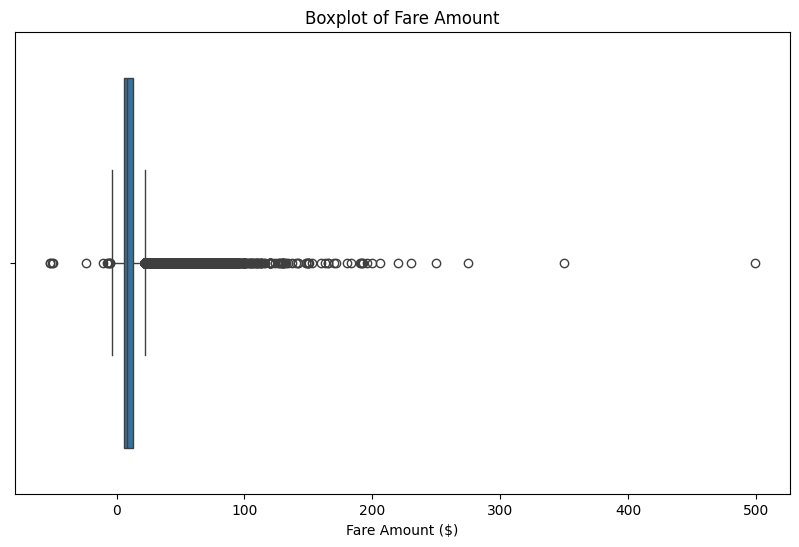

In [14]:
# ✅ 3. Check for outliers in fare_amount
plt.figure(figsize=(10,6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.show()

4. Fare amount distribution

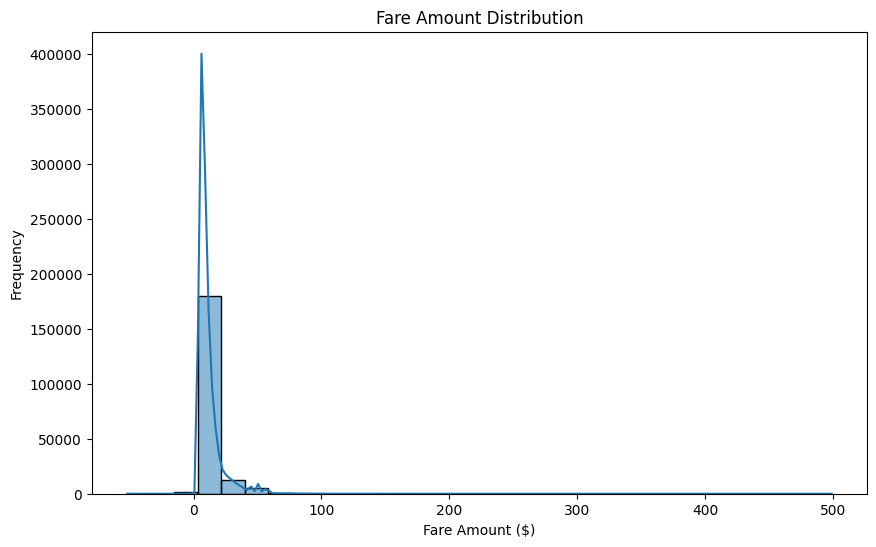

In [15]:
# ✅ 4. Fare amount distribution
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

5. Relationship: fare amount vs hour of day

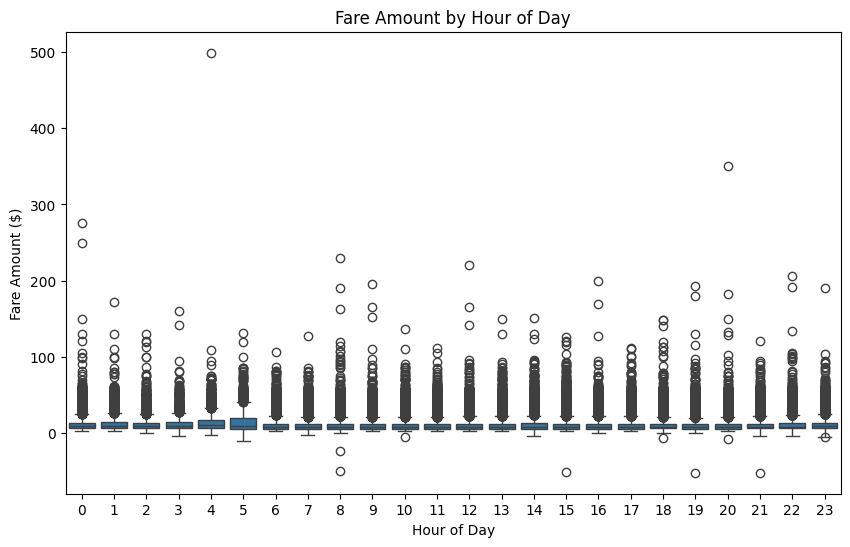

In [16]:
# ✅ 5. Relationship: fare amount vs hour of day
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.show()

6. Relationship: fare amount vs day of week

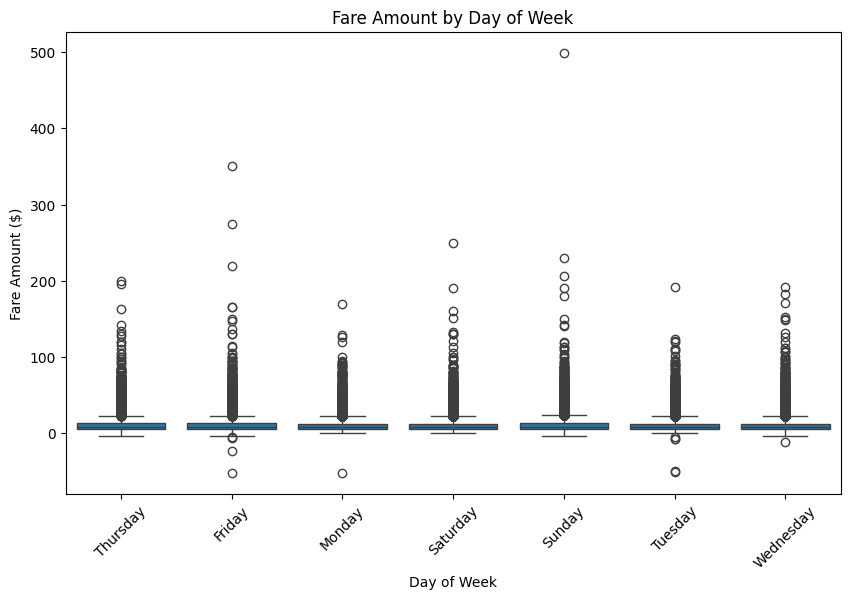

In [17]:
# ✅ 6. Relationship: fare amount vs day of week
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='fare_amount', data=df)
plt.title('Fare Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()

✅ 7. Correlation heatmap

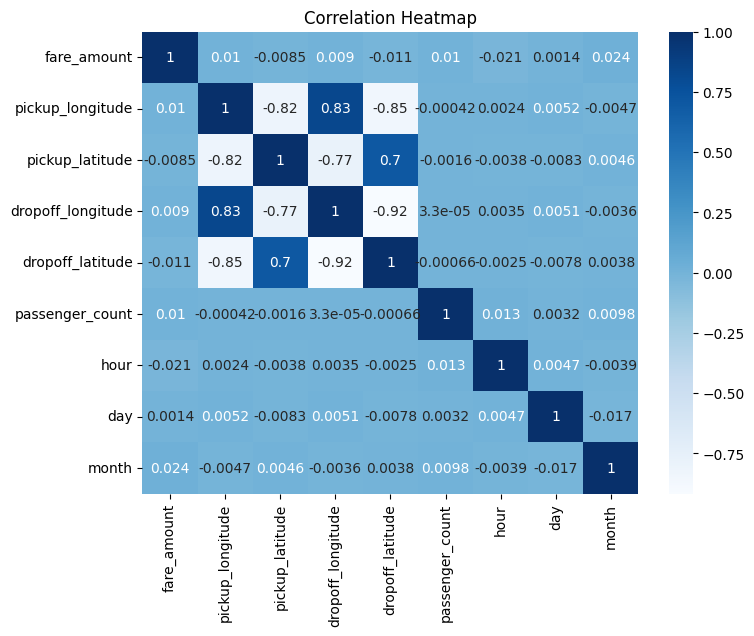

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [1]:
df['ride_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60  # in minutes


NameError: name 'df' is not defined